# Machine Vibration Analysis

We are analyzing CNC machine vibration data to calculate the number of idle cycles and calculating machine productivity.

In [3]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
print("Libraries imported.")

Libraries imported.


C:\Users\Bhavya\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# importing data
cnc = pd.read_csv('CNC.csv', names = ['Timestamp','VibIntensity'])
print("Data imported.")

Data imported.


In [5]:
# checking the data types
print('CNC data: ')
print(cnc.dtypes)

CNC data: 
Timestamp        object
VibIntensity    float64
dtype: object


In [16]:
# converting data to time series format
cnc['Timestamp'] = pd.to_datetime(cnc['Timestamp'])
print('Time series created.')

Time series created.


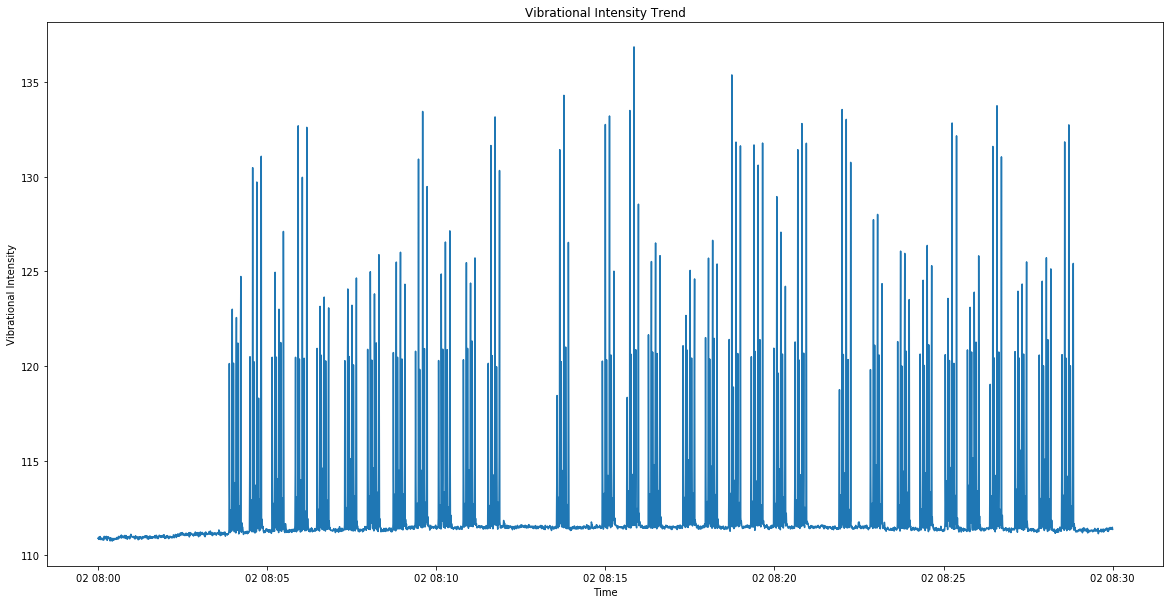

In [7]:
# plotting the graph
%matplotlib inline
fig1 = plt.figure(figsize = (20,10))
ax1 = fig1.add_subplot(111)
ax1.set_title('Vibrational Intensity Trend')
ax1.set_xlabel('Time')
ax1.set_ylabel('Vibrational Intensity')
plt.plot(cnc['Timestamp'], cnc['VibIntensity'])
plt.show()

In [8]:
# checking the nature of CNC data
cnc_adf = sm.tsa.stattools.adfuller(cnc['VibIntensity'])
cnc_adf

(-11.838837357368892,
 7.6752990066305346e-22,
 29,
 3408,
 {'1%': -3.4322702559591045,
  '10%': -2.5672216503043104,
  '5%': -2.862388458280023},
 16190.349664582984)

Since the ADF results show a P-value < 0.05, we conclude that the CNC time series is stationary.

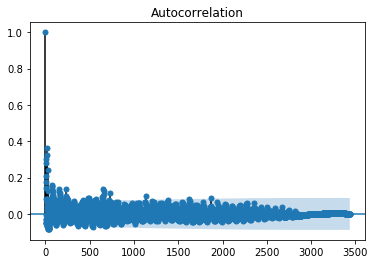

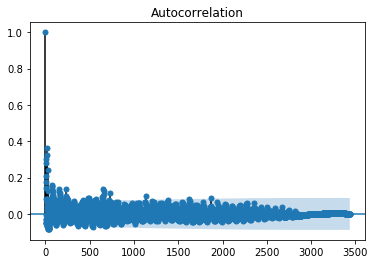

In [9]:
# plotting the ACF
plot_acf(cnc['VibIntensity'], fft = True)

In [10]:
# extracting ACF values
acf_arr = acf(cnc['VibIntensity'], fft = True)
acf_arr

array([ 1.        ,  0.17821545, -0.03324356, -0.04802976,  0.14317398,
        0.2064161 ,  0.08097472, -0.04883387, -0.00452863,  0.30402978,
        0.28269164, -0.02980776, -0.04743559,  0.04072422,  0.36062358,
        0.32582773,  0.02338949, -0.06772593, -0.02975626,  0.08040178,
        0.08467782, -0.05975888, -0.06550481,  0.05858256,  0.12348898,
        0.0459429 , -0.08072789, -0.06865525,  0.01729976,  0.2402793 ,
       -0.01420524, -0.08465557, -0.07873927, -0.05906305, -0.06244417,
       -0.08181635, -0.08291179, -0.04131138,  0.04968198,  0.00419453,
       -0.07532548])

C:\Users\Bhavya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


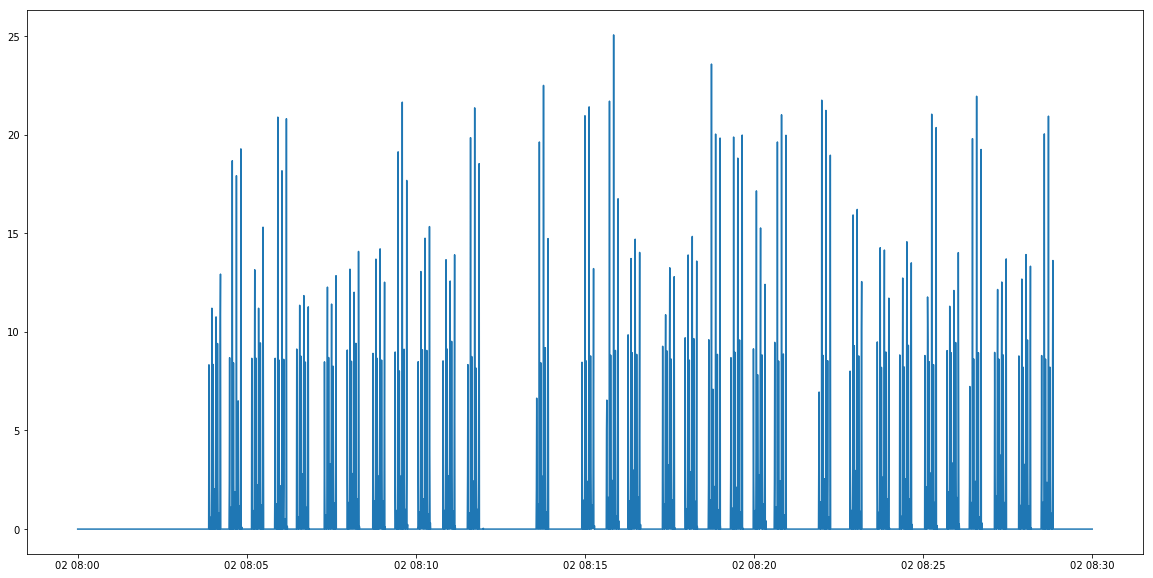

In [11]:
# indentifying the gaps
c = 111.8
cnc['Diff'] = cnc['VibIntensity'] - c
for i in range(0,len(cnc)):
    if(cnc['Diff'][i] <= 0):
        cnc['Diff'][i] = 0
fig4 = plt.figure(figsize = (20,10))
ax4 = fig4.add_subplot(111)
plt.plot(cnc['Timestamp'], cnc['Diff'])
plt.show()

In [13]:
# cycle gaps
time = []
for i in range(len(cnc)):
    if ((cnc['Diff'][i] > 0) and (cnc['Diff'][i - 1] == 0)):
        temp1 = cnc['Timestamp'][i-1]
        for j in range(2,i):
            if (cnc['Diff'][i - j] > 0):
                temp2 = cnc['Timestamp'][i - j + 1]
                break
            else:
                temp2 = cnc['Timestamp'][0]
        time.append(temp1 - temp2)
print('Idle times registered.')

Idle times registered.


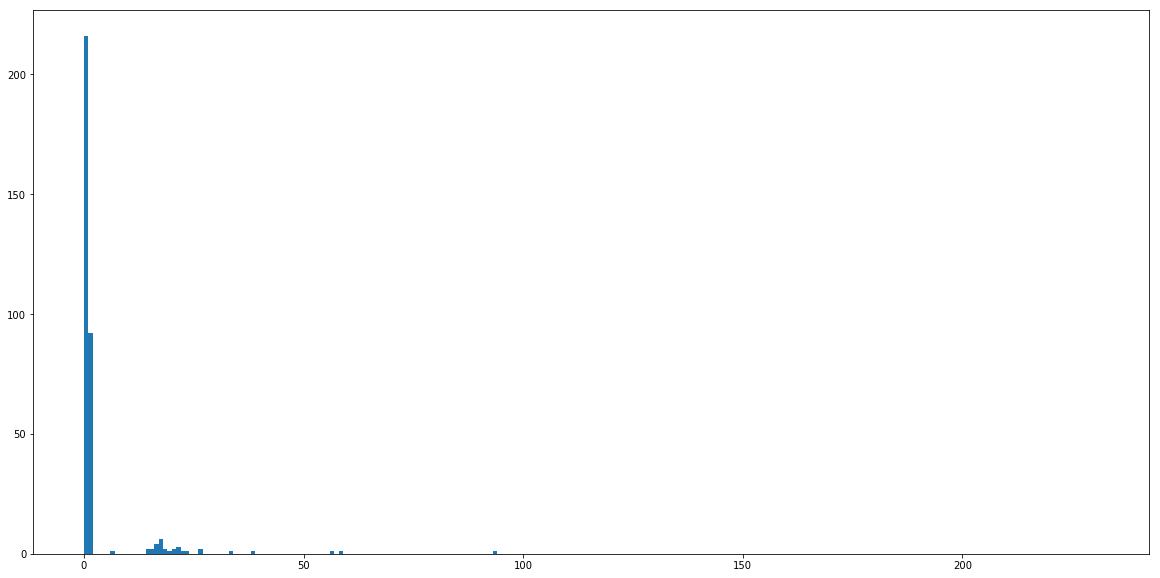

In [14]:
# calculating the average cycle time
seconds = []
for i in range(len(time)):
    seconds.append(time[i].total_seconds())
fig6 = plt.figure(figsize = (20,10))
plt.hist(seconds, bins = range(0,int(max(seconds))))
plt.show()

This shows that almost all of the cycle time is between 10 to 30 seconds in duration.

In [15]:
cycle_pre = 0
anom = 0
mc = 0
productive = 0
total = 0
for i in range(len(seconds)):
    total = total + seconds[i]
for i in range(len(seconds)):
    if((seconds[i] >= 10) and (seconds[i] <= 30)):
        cycle_pre = cycle_pre + 1
        productive = productive + seconds[i]
    elif(seconds[i] > 30):
        anom = anom + 1
        if(seconds[i] > 90):
            mc = mc + 1
print('The number of cycles found: ',cycle_pre+1)
print('The number of anomalies found: ',anom)
print('The number of idle cycles found: ',mc)
print('CNC productivity: ', 100*(productive/total),'%')

The number of cycles found:  27
The number of anomalies found:  6
The number of idle cycles found:  2
CNC productivity:  41.88270774355791 %
